In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ecco_v4_py as ecco
import sys
sys.path.append('/home3/sreich/MITgcm_c68w/MITgcm/utils/python/MITgcmutils')

from MITgcmutils import rdmds, llc


sys.path.append('/home3/sreich/jupyter/jupyter_notebooks')
from patchface3D import *


In [22]:
nx = 90
nz = 50

run_dir_68w='/nobackup/sreich/multigrid_test_ou/c68w/llc90/run.v4_rls4.077d3.iter0.fwd/'
run_dir_66g='/nobackup/sreich/multigrid_test_ou/llc90/run.v4_rls4.077d3.iter0.fwd/'


In [23]:
eta_old = rdmds(run_dir_66g+'Eta.0000000721')
eta_new = rdmds(run_dir_68w+'Eta.0000000721')

np.nansum(eta_old - eta_new)

-9.875684307940446

1
(90, 270, 1)


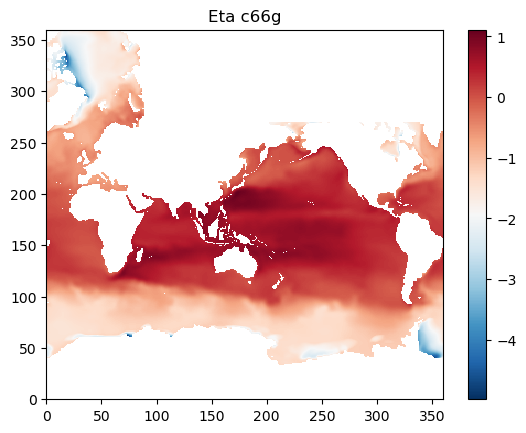

1
(90, 270, 1)


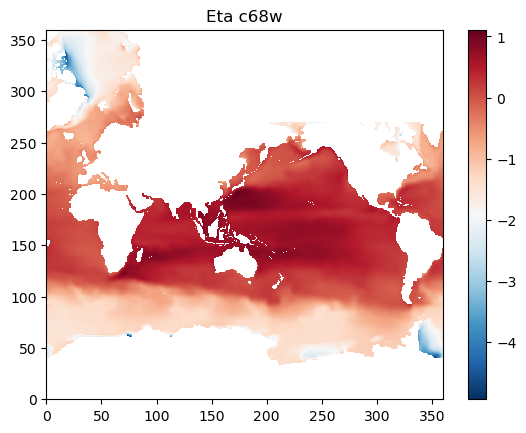

1
(90, 270, 1)


Text(0.5, 1.0, 'Eta Diff Between Checkpoints')

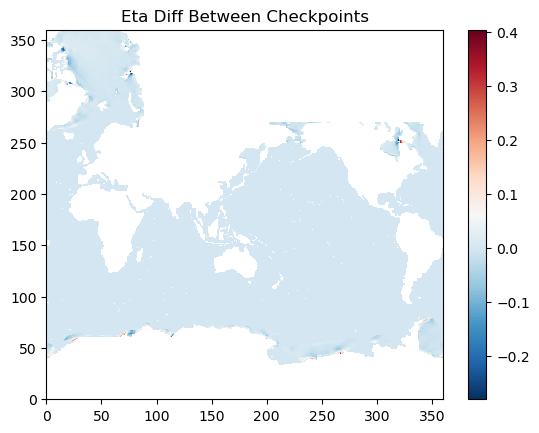

In [21]:
adxx_wrl = patchface3D(eta_old, nx, 1)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
plt.pcolormesh(adxx_wrl, cmap='RdBu_r')
plt.colorbar()
plt.title('Eta c66g')
plt.show()

adxx_wrl = patchface3D(eta_new, nx, 1)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
plt.pcolormesh(adxx_wrl, cmap='RdBu_r')
plt.colorbar()
plt.title('Eta c68w')
plt.show()

adxx_wrl = patchface3D(eta_old - eta_new, nx, 1)[0, :, :]
adxx_wrl[adxx_wrl == 0] = np.nan
plt.pcolormesh(adxx_wrl, cmap='RdBu_r')
plt.colorbar()
plt.title('Eta Diff Between Checkpoints')

50
(90, 270, 50)
50
(90, 270, 50)
50
(90, 270, 50)
50
(90, 270, 50)


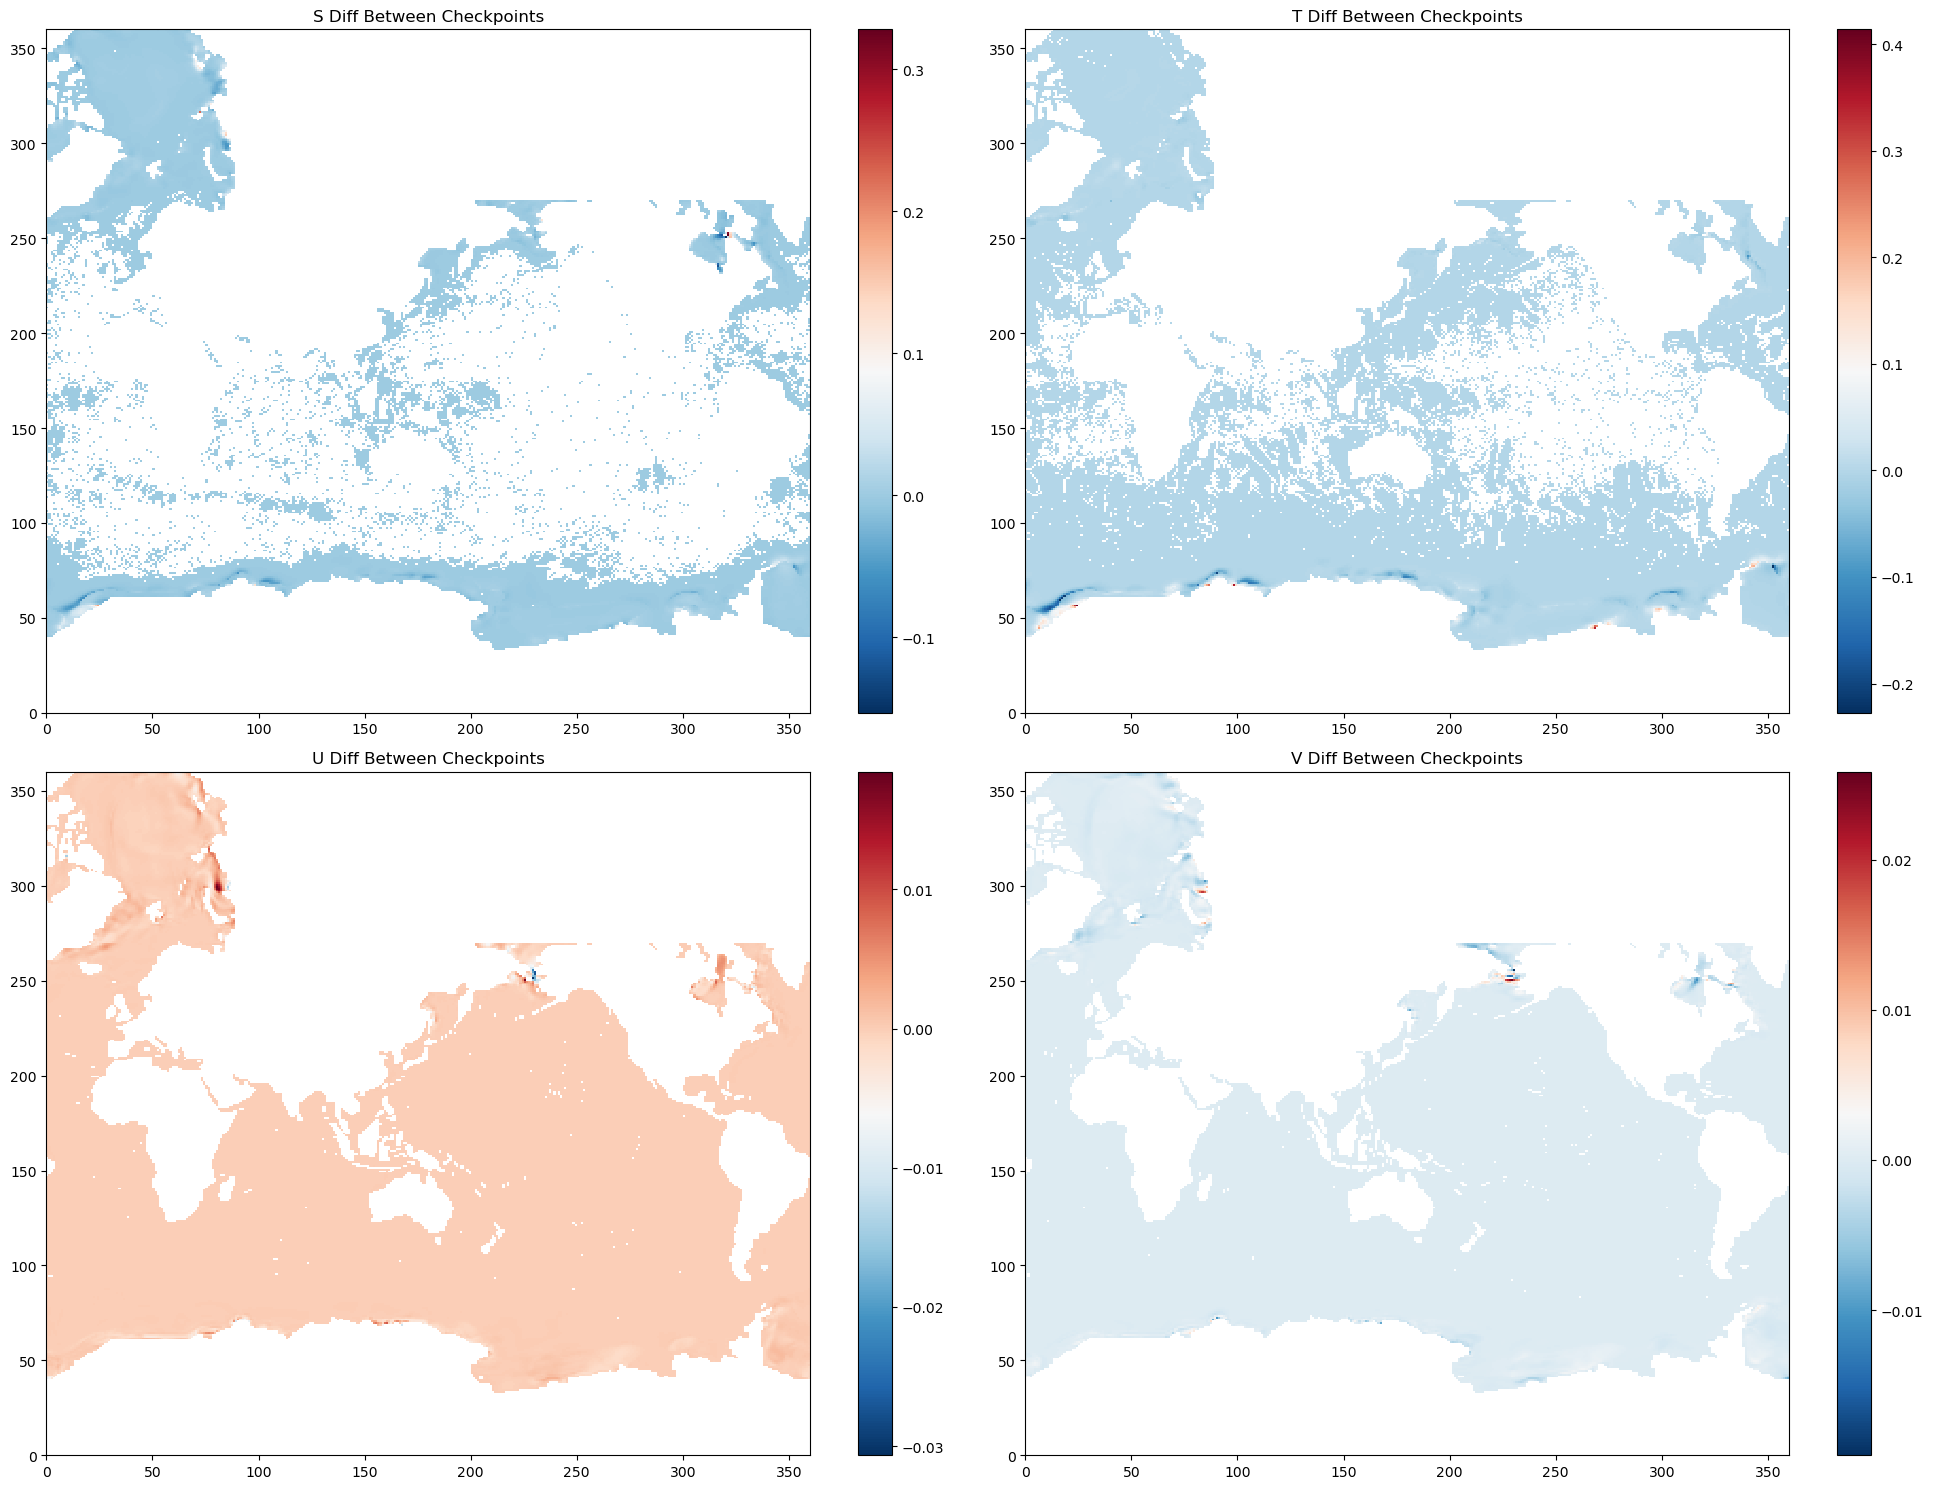

In [36]:
s_old = rdmds(run_dir_66g+'S.0000000721')
s_new = rdmds(run_dir_68w+'S.0000000721')

T_old = rdmds(run_dir_66g+'T.0000000721')
T_new = rdmds(run_dir_68w+'T.0000000721')

u_old = rdmds(run_dir_66g+'U.0000000721')
u_new = rdmds(run_dir_68w+'U.0000000721')

v_old = rdmds(run_dir_66g+'V.0000000721')
v_new = rdmds(run_dir_68w+'V.0000000721')

old = [s_old, T_old, u_old, v_old]
new = [s_new, T_new, u_new, v_new]
titles = ['S', 'T', 'U', 'V']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))



for i, ax in enumerate(axes.flat):
    
    wrl = patchface3D(old[i] - new[i], nx, nz)[0, :, :]
    wrl[wrl == 0] = np.nan
    
    pcm = ax.pcolormesh(wrl, cmap='RdBu_r')
    fig.colorbar(pcm, ax=ax)
    ax.set_title(titles[i] + ' Diff Between Checkpoints')


plt.tight_layout()
plt.show()